In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('datasets/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
x = data.drop('MEDV', axis=1).values
y = data['MEDV'].values


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
model = LinearRegression()

In [8]:
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
model.score(x_train, y_train)

0.7651074116381607

In [10]:
model.score(x_test, y_test)

0.5861725476185595

In [11]:
p_train = model.predict(x_train)
p_test = model.predict(x_test)
mean_absolute_error(y_train, p_train)

3.1808016663023215

In [12]:
mean_absolute_error(y_test, p_test)

3.6862392758463725

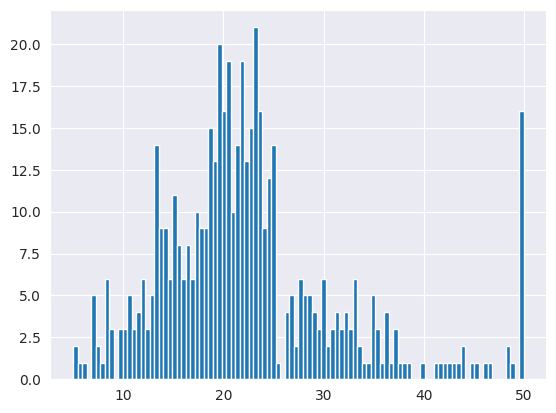

In [13]:
plt.hist(data['MEDV'], bins=100);

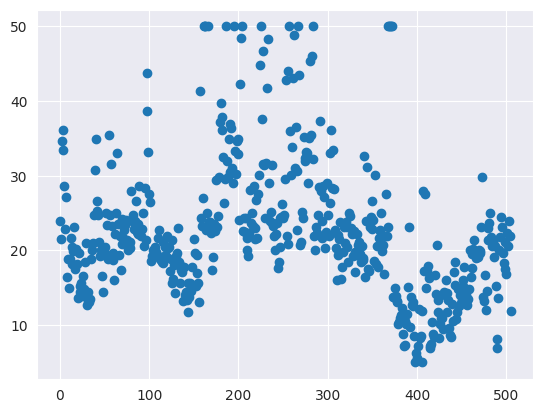

In [14]:
plt.scatter(range(len(data['MEDV'])), data['MEDV']);

/tmp/ipykernel_4349/3145139367.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MEDV']);


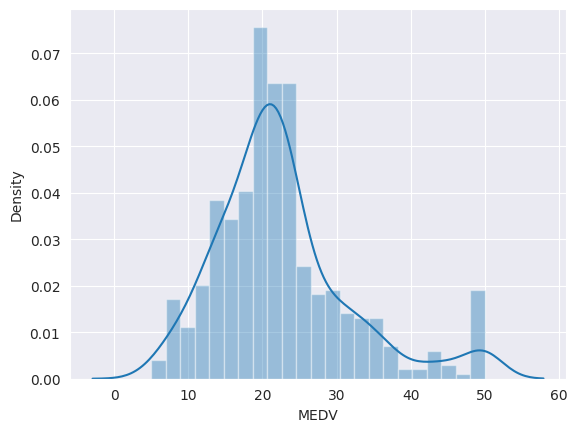

In [15]:
sns.distplot(data['MEDV']);

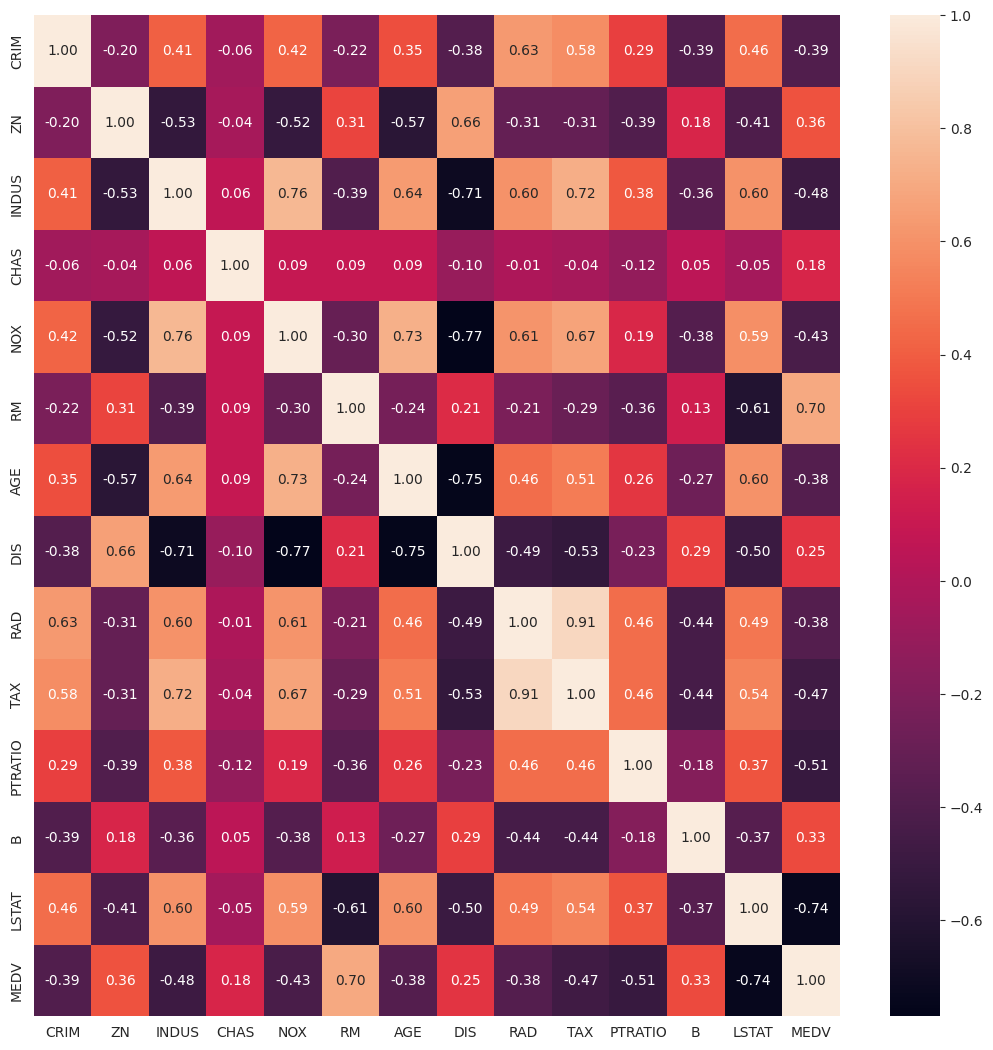

In [16]:
a = data.corr().round(2)
plt.figure(figsize=(13, 13))
sns.heatmap(a, annot=True, fmt=".2f");

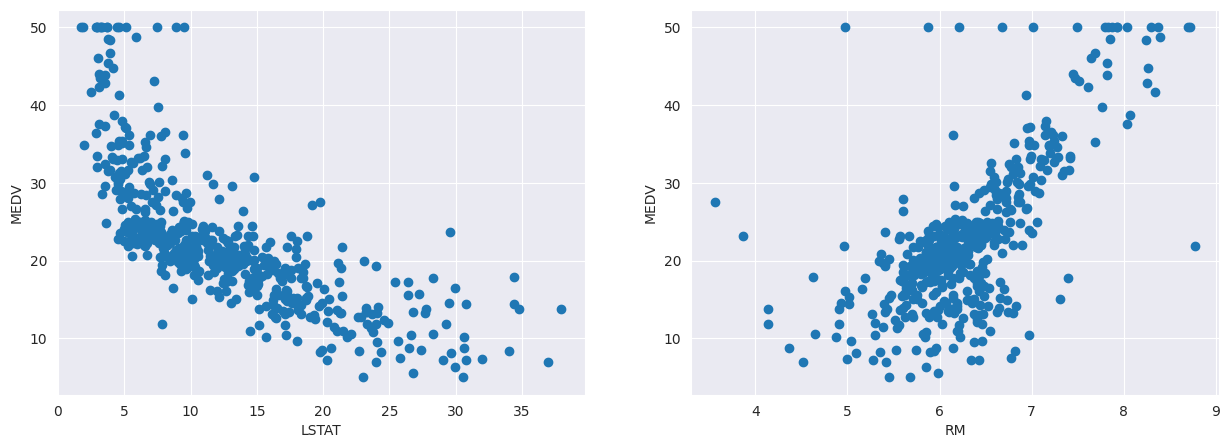

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['LSTAT'], data['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.subplot(1, 2, 2)
plt.scatter(data['RM'], data['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV');

In [18]:
x = data.loc[:, ['LSTAT', 'RM']].values
y = data['MEDV'].values

In [19]:
d = np.where(y != 50)
x = x[d]
y = y[d]
print(x.shape)
print(y.shape)


(490, 2)
(490,)


In [20]:
s = y.std()
d = np.where((y < y.mean() + 3*s) & (y > y.mean() - 3*s))
x = x[d]
y = y[d]
print(x.shape)
print(y.shape)

(484, 2)
(484,)


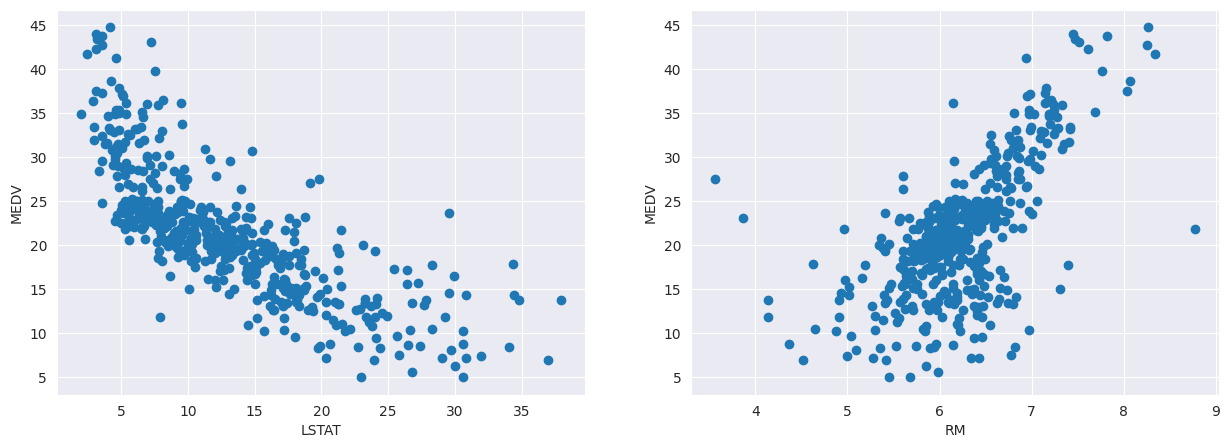

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], y)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.subplot(1, 2, 2)
plt.scatter(x[:, 1], y)
plt.xlabel('RM')
plt.ylabel('MEDV');

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(387, 2)
(97, 2)


In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
poly.fit(x_train)
x_train_p = poly.transform(x_train)

In [24]:
model = LinearRegression(fit_intercept=False)

In [25]:
model.fit(x_train_p, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",False
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [26]:
model.score(x_train_p, y_train)

0.7933183877344442

In [27]:
x_test_p = poly.transform(x_test)

In [28]:
model.score(x_test_p, y_test)

0.7969706106972205

In [29]:
p_train = model.predict(x_train_p)
p_test = model.predict(x_test_p)
mean_absolute_error(y_train, p_train)

2.5603191022784446